# Scaling / Timing Analysis

## Setup

Load Python, R, etc.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

## Load the data

In [3]:
timings = pd.read_csv('build/timing.csv')
timings

,dataset,mptype,threads,run,time
0,ml-100k,seq,NaN,0,1.115961
1,ml-100k,seq,NaN,1,1.105768
2,ml-100k,seq,NaN,2,1.099157
3,ml-100k,seq,NaN,3,1.183898
4,ml-100k,seq,NaN,4,1.092536
5,ml-100k,seq,NaN,5,1.086697
6,ml-100k,seq,NaN,6,1.096109
7,ml-100k,seq,NaN,7,1.122116
8,ml-100k,seq,NaN,8,1.085509
9,ml-100k,seq,NaN,9,1.087704


Extract the sequential timings:

In [4]:
seq_time = timings[timings.mptype == 'seq']
omp_time = timings[timings.mptype == 'openmp'].copy()

In [5]:
seq_time.time.describe()

count    20.000000
mean      2.820771
std       1.758017
min       1.085509
25%       1.098395
50%       2.826579
75%       4.542873
max       4.581380
Name: time, dtype: float64

In [6]:
mean_seq = seq_time.groupby('dataset').time.mean()
mean_seq

dataset
ml-100k    1.107546
ml-1m      4.533997
Name: time, dtype: float64

In [13]:
omp_time = omp_time.set_index(['dataset', 'threads', 'run']).assign(adj_time = lambda df: mean_seq / df.time).reset_index()
omp_time.head()

,dataset,threads,run,mptype,time,adj_time
0,ml-100k,NaN,0,openmp,13.060671,0.084800
1,ml-100k,NaN,1,openmp,13.094730,0.084579
2,ml-100k,NaN,2,openmp,13.128027,0.084365
3,ml-100k,NaN,3,openmp,13.113127,0.084461
4,ml-100k,NaN,4,openmp,13.065971,0.084766


## Plot OpenMP speedups

In [14]:
omp_means = omp_time[omp_time.threads.notna()].groupby(['dataset', 'threads']).adj_time.agg(['mean', 'min', 'max']).reset_index()
omp_means

,dataset,threads,mean,min,max
0,ml-100k,1.0,1.026532,0.992850,1.044699
1,ml-100k,2.0,0.770835,0.739274,0.812128
2,ml-100k,3.0,0.413855,0.387749,0.445006
3,ml-100k,4.0,0.214470,0.183474,0.274643
4,ml-100k,5.0,0.141874,0.137154,0.153526
5,ml-100k,6.0,0.107460,0.104279,0.111143
6,ml-100k,7.0,0.102055,0.100365,0.103265
7,ml-100k,8.0,0.098686,0.094418,0.101170
8,ml-100k,12.0,0.092595,0.091098,0.093537
9,ml-100k,16.0,0.089469,0.088319,0.090322


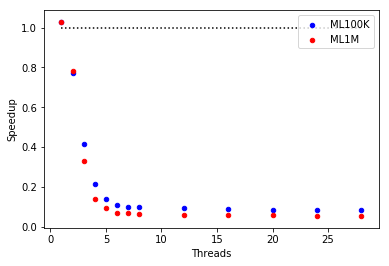

In [15]:
fig, ax = plt.subplots()
omp_means[omp_means.dataset == 'ml-100k'].plot.scatter(x='threads', y='mean', color='blue', label='ML100K', ax=ax)
omp_means[omp_means.dataset == 'ml-1m'].plot.scatter(x='threads', y='mean', color='red', label='ML1M', ax=ax)
ax.set_xlabel('Threads')
ax.set_ylabel('Speedup')
plt.hlines(1, omp_means.threads.min(), omp_means.threads.max(), linestyles='dotted')
plt.show()